<a href="https://colab.research.google.com/github/srujan-padala/PSDV/blob/main/PSDV(Assgn_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the datasets
data = pd.read_csv("/content/Data.csv")
state_data = pd.read_csv("/content/State_data.csv")
funding_data = pd.read_csv("/content/NCAP_Funding.csv")


1. Spatial aggregation. [4 Marks]

Q1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?


In [ ]:
highest_avg_state = data.groupby("state")["PM2.5"].mean().idxmax()
highest_avg_value = data.groupby("state")["PM2.5"].mean().max()

print(f"State with highest average PM2.5: {highest_avg_state} ({highest_avg_value:.2f} µg/m³)")


State with highest average PM2.5: Delhi (104.10 µg/m³)


Q2.Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?


In [ ]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data_2023 = data[data["Timestamp"].dt.year == 2023]

hazardous_days = data_2023[data_2023["PM2.5"] > 300].groupby("state")["Timestamp"].nunique() #only count each day once

if hazardous_days.empty:
    print("No state recorded hazardous PM2.5 levels in 2023.")
else:
    most_hazardous_state = hazardous_days.idxmax()
    most_hazardous_days = hazardous_days.max()
    print(f"Most hazardous state in 2023: {most_hazardous_state} ({most_hazardous_days} days)")


Most hazardous state in 2023: Delhi (49 days)


Q3.Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [ ]:
state_variability = data_2023.groupby("state")["PM2.5"].std()

if state_variability.empty:
    print("No PM2.5 data available for 2023.")
else:
    most_variable_state = state_variability.idxmax()
    highest_variability = state_variability.max()
    print(f"Highest PM2.5 variability: {most_variable_state} (Std Dev: {highest_variability:.2f})")


Highest PM2.5 variability: Delhi (Std Dev: 82.80)


Q4.Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [ ]:
covid_data = data[(data["Timestamp"].dt.year >= 2020) & (data["Timestamp"].dt.year <= 2021)]
lowest_avg_state = covid_data.groupby("state")["PM2.5"].mean().idxmin()
lowest_avg_value = covid_data.groupby("state")["PM2.5"].mean().min()

print(f"Lowest PM2.5 during Covid: {lowest_avg_state} ({lowest_avg_value:.2f} µg/m³)")


Lowest PM2.5 during Covid: Mizoram (14.32 µg/m³)


2.Temporal Aggregation [3 Marks]

Q1.Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.


In [ ]:


# Ensure Timestamp column is in datetime format
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")
# Filter data for August 2020
aug_2020 = data[(data["Timestamp"].dt.year == 2020) & (data["Timestamp"].dt.month == 8)]

# Find the station with the highest PM2.5 value (handling empty dataframe case)
max_pm25_row = aug_2020.loc[aug_2020["PM2.5"].idxmax(), ["station", "PM2.5"]] if not aug_2020.empty else None

print(f"Station with highest PM2.5 in Aug 2020: {max_pm25_row['station']} ({max_pm25_row['PM2.5']} µg/m³)" if max_pm25_row is not None else "No data available for August 2020.")


Station with highest PM2.5 in Aug 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB (805.51 µg/m³)


Q2.For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


In [ ]:
stations = ["Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]
data_2018 = data[(data["Timestamp"].dt.year == 2018) & (data["station"].isin(stations))]

seasons = {
    "Winter": [12, 1, 2],
    "Summer": [3, 4, 5],
    "Monsoon": [6, 7, 8, 9]
}

seasonal_avg = {season: data_2018[data_2018["Timestamp"].dt.month.isin(months)]["PM2.5"].mean()
                for season, months in seasons.items()}

highest_pollution_season = max(seasonal_avg, key=seasonal_avg.get)

print(f"Highest PM2.5 season in 2018: {highest_pollution_season} ({seasonal_avg[highest_pollution_season]:.2f} µg/m³)")


Highest PM2.5 season in 2018: Winter (67.49 µg/m³)


 [Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?

Ans: Several factors contribute to seasonal variations in pollution levels:

Winter (High Pollution):

Cold air traps pollutants near the surface (temperature inversion).
Increased use of wood/coal burning for heating.
Reduced wind speed leads to pollution accumulation.
Summer (Moderate Pollution):

Higher temperatures cause some pollutants to dissipate.
Increased photochemical reactions can lead to ozone pollution.
Winds may help disperse pollutants.
Monsoon (Low Pollution):

Rain washes away air pollutants, reducing PM2.5 levels.
Higher humidity may also contribute to air purification.

Q3.Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:

a.Calculate the monthly average PM2.5 for weekdays and weekends separately

b.X-axis: Months (January to December).

c.Y-axis: Average PM2.5 levels.

d.Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.

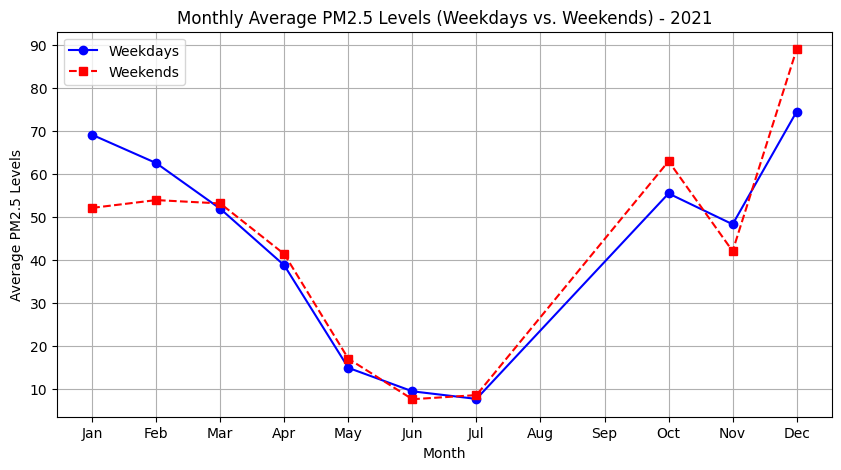

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets

# Convert 'Timestamp' to datetime format
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors='coerce')

# Filter data for the required station and year 2021
station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
data = data[(data["station"] == station_name) & (data["Timestamp"].dt.year == 2021)]

# Drop missing values in PM2.5
data = data.dropna(subset=["PM2.5"])

# Extract month and weekday information
data["Month"] = data["Timestamp"].dt.month
data["Day_Type"] = data["Timestamp"].dt.weekday.apply(lambda x: "Weekday" if x < 5 else "Weekend")

# Compute the monthly average PM2.5 levels
monthly_avg = data.groupby(["Month", "Day_Type"])["PM2.5"].mean().unstack()

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg["Weekday"], marker="o", label="Weekdays", color="blue")
plt.plot(monthly_avg.index, monthly_avg["Weekend"], marker="s", linestyle="--", label="Weekends", color="red")

# Formatting
plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels")
plt.title("Monthly Average PM2.5 Levels (Weekdays vs. Weekends) - 2021")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)
plt.show()


**Spatio-temporal aggregation [3 marks]**

Q1.For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert Timestamp to datetime
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors='coerce')

# Extract year and month
data["Year"] = data["Timestamp"].dt.year
data["Month"] = data["Timestamp"].dt.month

# Filter for the year 2022
data_2022 = data[data["Year"] == 2022]

# Define seasonal masks
summer_mask = data_2022["Month"].isin([3, 4, 5])
monsoon_mask = data_2022["Month"].isin([6, 7, 8, 9])

# Compute average PM2.5 for each state in summer and monsoon
summer_avg = data_2022[summer_mask].groupby("state")["PM2.5"].mean()
monsoon_avg = data_2022[monsoon_mask].groupby("state")["PM2.5"].mean()

# Calculate percentage change, handling division by zero
difference = ((monsoon_avg - summer_avg) / summer_avg.replace(0, np.nan)) * 100

# Ensure difference is not empty before finding max change
if not difference.empty:
    most_diff_state = difference.abs().idxmax()
    most_diff_value = difference[most_diff_state]
    print(f"State with most difference: {most_diff_state}, Change: {most_diff_value:.2f}%")
else:
    print("No valid PM2.5 data found for summer or monsoon in 2022.")


No valid PM2.5 data found for summer or monsoon in 2022.


Q2.Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?


<Figure size 1000x500 with 0 Axes>

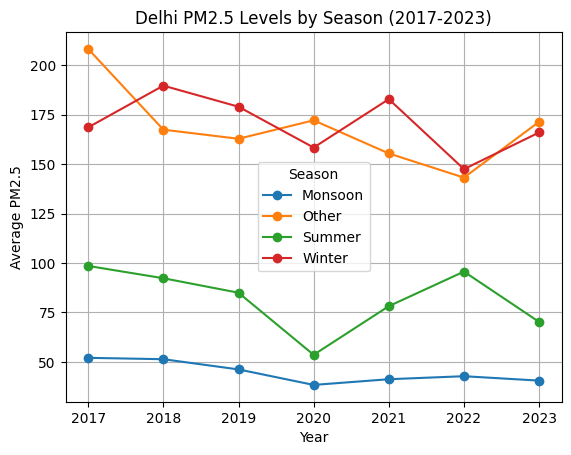

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# Load the datasets
data = pd.read_csv("/content/Data.csv")
state_data = pd.read_csv("/content/State_data.csv")
funding_data = pd.read_csv("/content/NCAP_Funding.csv")

# Convert Timestamp to datetime
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors='coerce')

# Extract year and month
data["Year"] = data["Timestamp"].dt.year
data["Month"] = data["Timestamp"].dt.month

# Filter data for Delhi from 2017 to 2023
delhi_data = data.loc[(data["state"].str.lower() == "delhi") & ((data["Year"] >= 2017) & (data["Year"] <= 2023))].copy()

# Define seasonal masks
delhi_data.loc[:, "Season"] = np.select(
    [
        delhi_data["Month"].isin([12, 1, 2]),  # Winter
        delhi_data["Month"].isin([3, 4, 5]),   # Summer
        delhi_data["Month"].isin([6, 7, 8, 9]) # Monsoon
    ],
    ["Winter", "Summer", "Monsoon"],
    default="Other"
)

# Compute seasonal averages
delhi_avg = delhi_data.groupby(["Year", "Season"])["PM2.5"].mean().unstack(fill_value=0)
# Plot the data
plt.figure(figsize=(10, 5))

delhi_avg.plot(marker="o")
plt.title("Delhi PM2.5 Levels by Season (2017-2023)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5")
plt.legend(title="Season")
plt.grid()
plt.show()


Q3.Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

<Figure size 1000x500 with 0 Axes>

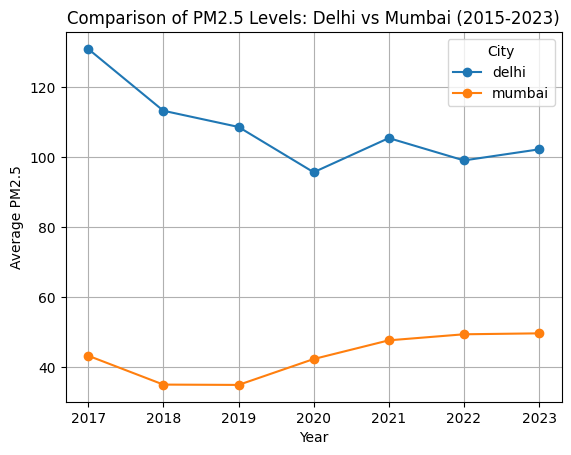

PM2.5 Standard Deviation (Fluctuation Measure):
city
delhi     11.717414
mumbai     6.271047
dtype: float64
Delhi had more fluctuations in PM2.5 levels than Mumbai.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/Data.csv")

# Convert Timestamp to datetime
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors='coerce')

# Extract year
data["Year"] = data["Timestamp"].dt.year

# Ensure all text data is in lowercase to avoid case sensitivity issues
data["state"] = data["state"].astype(str).str.lower()
data["city"] = data["city"].astype(str).str.lower()

# Filter data for Delhi (using state) and Mumbai (using city) from 2015 to 2023
delhi_mumbai_data = data.loc[
    ((data["state"] == "delhi") | (data["city"] == "mumbai")) &
    (data["Year"].between(2015, 2023))
].copy()

# Compute annual average PM2.5 levels
delhi_mumbai_avg = delhi_mumbai_data.groupby(["Year", "city"]) ["PM2.5"].mean().unstack()

# Plot the data
plt.figure(figsize=(10, 5))
delhi_mumbai_avg.plot(marker="o")
plt.title("Comparison of PM2.5 Levels: Delhi vs Mumbai (2015-2023)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5")
plt.legend(title="City")
plt.grid()
plt.show()

# Calculate standard deviation to assess fluctuations
fluctuation = delhi_mumbai_avg.std()
print("PM2.5 Standard Deviation (Fluctuation Measure):")
print(fluctuation)

# Determine which city had more fluctuations
if fluctuation["mumbai"] > fluctuation["delhi"]:
    print("Mumbai had more fluctuations in PM2.5 levels than Delhi.")
elif fluctuation["mumbai"] < fluctuation["delhi"]:
    print("Delhi had more fluctuations in PM2.5 levels than Mumbai.")
else:
    print("Both cities had similar fluctuations in PM2.5 levels.")



**Population-Based [3 Marks]**

1. Which state in India has the highest number of monitoring stations relative to its population?




In [ ]:
import pandas as pd

# Load datasets
data_path = "/content/Data.csv"
state_data_path = "/content/State_data.csv"

data = pd.read_csv(data_path)
state_data = pd.read_csv(state_data_path)

# Count the number of unique monitoring stations per state
station_counts = data.groupby("state")["station"].nunique().reset_index()
station_counts.rename(columns={"station": "Num_Stations"}, inplace=True)

# Merge station count with state population data
merged_data = station_counts.merge(state_data, left_on="state", right_on="State", how="inner")

# Calculate the ratio of number of stations to population
merged_data["Stations_to_Population_Ratio"] = merged_data["Num_Stations"] / merged_data["Population"]

# Find the state with the highest ratio
highest_state = merged_data.loc[merged_data["Stations_to_Population_Ratio"].idxmax(), ["State", "Stations_to_Population_Ratio"]]

# Print the result
print("State with highest stations to population ratio:")
print(highest_state)


State with highest stations to population ratio:
State                           Chandigarh
Stations_to_Population_Ratio      0.000003
Name: 4, dtype: object


2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.


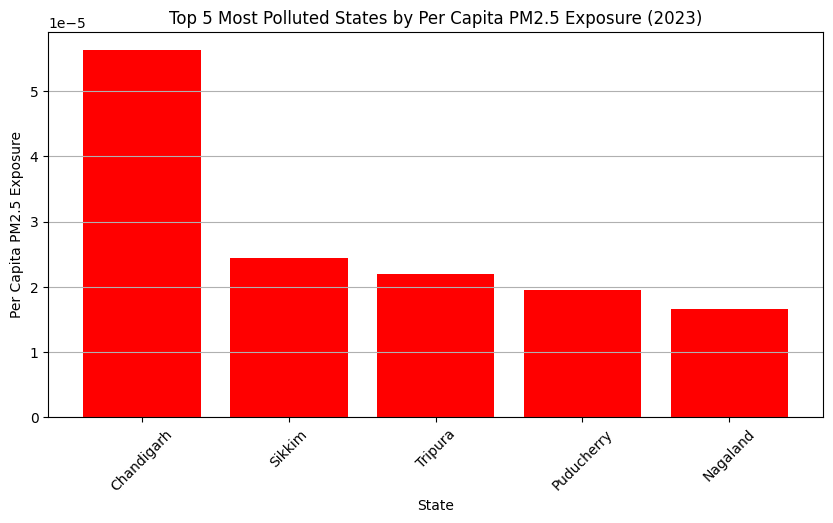

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Standardize column names before merging
state_data.rename(columns={"State": "state", "Population": "population"}, inplace=True)

# Convert Timestamp to datetime
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")

# Extract year
data["Year"] = data["Timestamp"].dt.year

# Filter for 2023 data
data_2023 = data[data["Year"] == 2023]

# Compute average PM2.5 per state
state_pm25 = data_2023.groupby("state")["PM2.5"].mean().reset_index()

# Merge with state population data
merged_data = state_pm25.merge(state_data, on="state", how="inner")

# Calculate per capita PM2.5 exposure (PM2.5 / population)
merged_data["Per Capita PM2.5"] = merged_data["PM2.5"] / merged_data["population"]

# Select top 5 states with highest per capita PM2.5 exposure
top_5_states = merged_data.nlargest(5, "Per Capita PM2.5")

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_5_states["state"], top_5_states["Per Capita PM2.5"], color="red")
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States by Per Capita PM2.5 Exposure (2023)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
X-axis: Population density (people per square kilometer).
Y-axis: Average PM2.5 concentration.
Use a scatter plot to show the relationship, where each point represents a state

Columns in state_data: Index(['state', 'population', 'Area (km2)'], dtype='object')


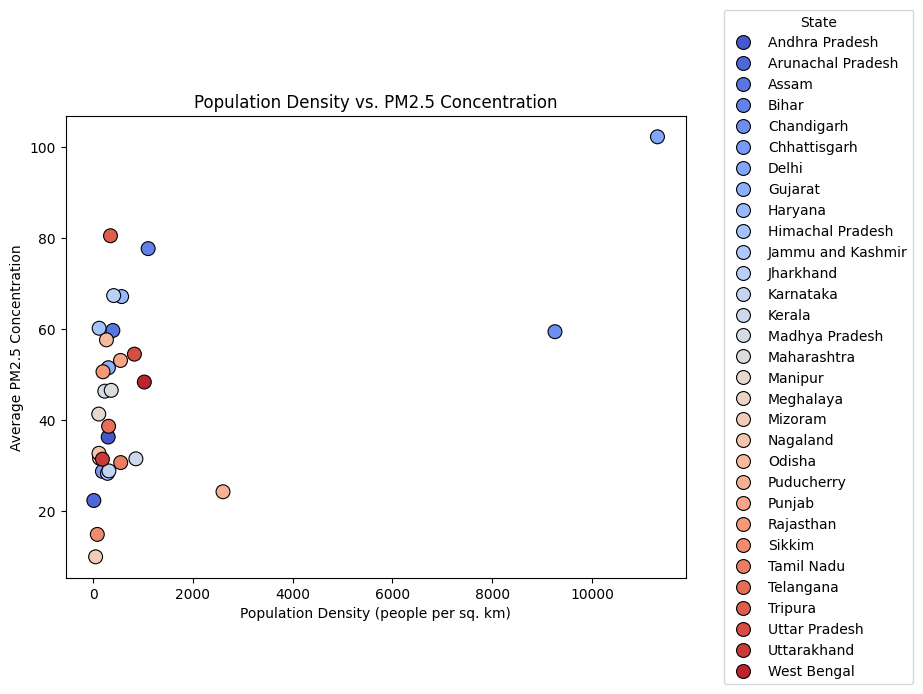

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check column names in state_data to identify the correct ones
print("Columns in state_data:", state_data.columns)

# Standardize column names before merging (update based on actual column names)
state_data.rename(columns={"State": "state", "Population": "population", "Area (km2)": "area"}, inplace=True)

# Convert Timestamp to datetime
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")

# Extract year
data["Year"] = data["Timestamp"].dt.year

# Filter for 2023 data
data_2023 = data[data["Year"] == 2023]

# Compute average PM2.5 per state
state_pm25 = data_2023.groupby("state")["PM2.5"].mean().reset_index()

# Compute population density (people per square km)
if "population" in state_data.columns and "area" in state_data.columns:
    state_data["Population Density"] = state_data["population"] / state_data["area"]
else:
    print("Error: 'population' or 'area' column is missing in state_data")

# Merge PM2.5 data with population density
scatter_data = state_pm25.merge(state_data, on="state", how="inner")

# Plot scatter plot of population density vs. PM2.5 concentration
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scatter_data["Population Density"], y=scatter_data["PM2.5"], hue=scatter_data["state"], palette="coolwarm", s=100, edgecolor="black")

# Add labels and title
plt.xlabel("Population Density (people per sq. km)")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Population Density vs. PM2.5 Concentration")
plt.legend(title="State", bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.grid(False)
plt.show()


**Area Based [3 Marks]**

Which state has the highest PM2.5 concentration per square kilometer?

 Plot the pollution levels for all states relative to their area.
  
  a. X-axis: States.

  b. Y-axis: PM2.5 concentration per square kilometer.

  c. Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


The state with the highest PM2.5 concentration per square kilometer is: Chandigarh


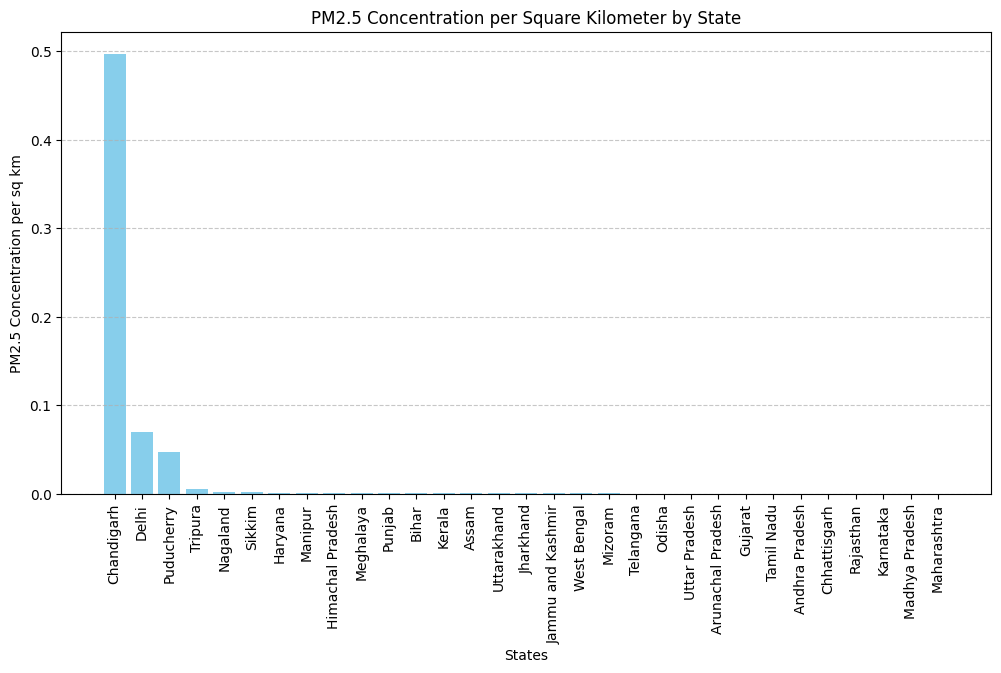

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Load the files
data_df = pd.read_csv("/content/Data.csv")
state_data_df = pd.read_csv("/content/State_data.csv")

# Drop rows with missing PM2.5 values and group by state to compute the average PM2.5 concentration per state
pm25_by_state = data_df.dropna(subset=["PM2.5"]).groupby("state")["PM2.5"].mean().reset_index()

# Rename columns for clarity
pm25_by_state.columns = ["State", "Avg_PM2.5"]

# Merge with state data to get the area information
merged_df = pd.merge(pm25_by_state, state_data_df, on="State", how="inner")

# Compute PM2.5 concentration per square kilometer
merged_df["PM2.5_per_sq_km"] = merged_df["Avg_PM2.5"] / merged_df["Area (km2)"]

# Identify the state with the highest PM2.5 concentration per square kilometer
highest_state = merged_df.loc[merged_df["PM2.5_per_sq_km"].idxmax(), "State"]
print(f"The state with the highest PM2.5 concentration per square kilometer is: {highest_state}")

# Sort data for better visualization
merged_df_sorted = merged_df.sort_values(by="PM2.5_per_sq_km", ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(merged_df_sorted["State"], merged_df_sorted["PM2.5_per_sq_km"], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("PM2.5 Concentration per sq km")
plt.title("PM2.5 Concentration per Square Kilometer by State")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.


The state with the highest density of monitoring stations per square kilometer is: Delhi


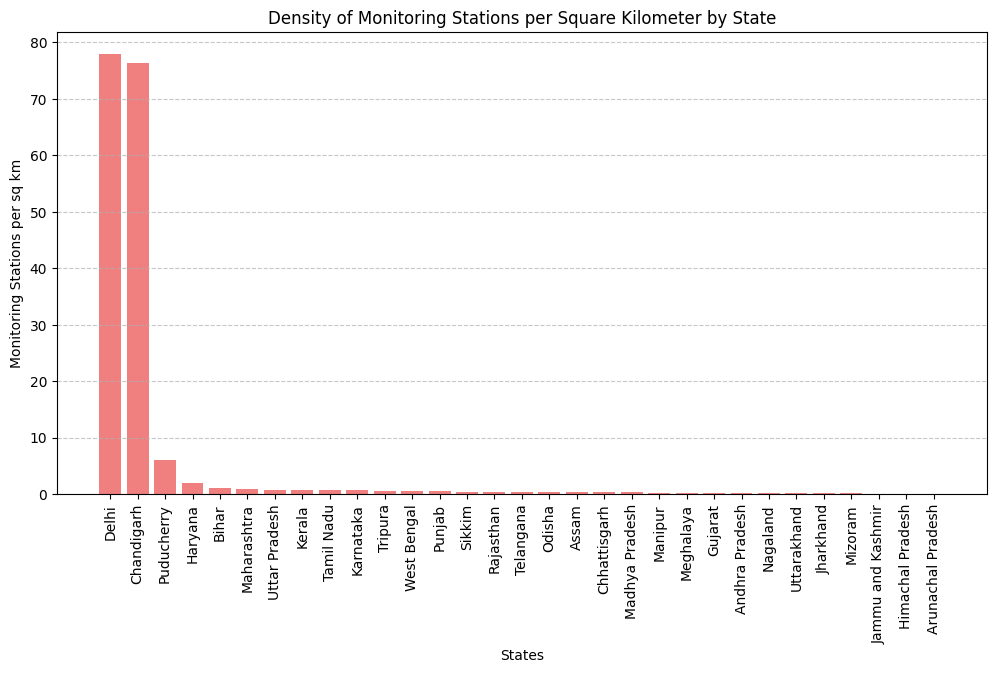

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of monitoring stations per state
stations_by_state = data_df.groupby("state").size().reset_index(name="Num_Stations")

# Rename columns for clarity
stations_by_state.columns = ["State", "Num_Stations"]

# Merge with state data to get the area information
merged_df = pd.merge(stations_by_state, state_data_df, on="State", how="inner")

# Compute monitoring stations per square kilometer
merged_df["Stations_per_sq_km"] = merged_df["Num_Stations"] / merged_df["Area (km2)"]

# Identify the state with the highest density of monitoring stations
highest_density_state = merged_df.loc[merged_df["Stations_per_sq_km"].idxmax(), "State"]
print(f"The state with the highest density of monitoring stations per square kilometer is: {highest_density_state}")

# Sort data for better visualization
merged_df_sorted = merged_df.sort_values(by="Stations_per_sq_km", ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(merged_df_sorted["State"], merged_df_sorted["Stations_per_sq_km"], color='lightcoral')
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Monitoring Stations per sq km")
plt.title("Density of Monitoring Stations per Square Kilometer by State")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

            State  Avg_PM2.5  Population  Area (km2)  Population_Density
0  Madhya Pradesh  47.095952    72626809      308252          235.608557
1     Maharashtra  46.440044   112374333      307713          365.192023


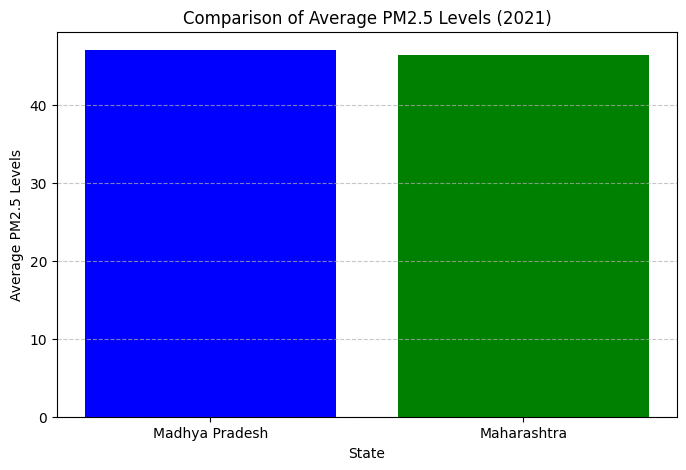

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert Timestamp to datetime format
data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"])

# Filter data for the year 2021
data_2021 = data_df[data_df["Timestamp"].dt.year == 2021]

# Filter data for Maharashtra and Madhya Pradesh
desired_states = ["Maharashtra", "Madhya Pradesh"]
data_2021_filtered = data_2021[data_2021["state"].isin(desired_states)]

# Compute average PM2.5 for each state
pm25_avg = data_2021_filtered.groupby("state")["PM2.5"].mean().reset_index()
pm25_avg.columns = ["State", "Avg_PM2.5"]

# Merge with state data to get population and area
merged_df = pd.merge(pm25_avg, state_data_df, on="State", how="inner")

# Compute population density (Population / Area)
merged_df["Population_Density"] = merged_df["Population"] / merged_df["Area (km2)"]

# Print analysis
print(merged_df)

# Plot the data
plt.figure(figsize=(8, 5))
plt.bar(merged_df["State"], merged_df["Avg_PM2.5"], color=['blue', 'green'])
plt.xlabel("State")
plt.ylabel("Average PM2.5 Levels")
plt.title("Comparison of Average PM2.5 Levels (2021)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

1.Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.


<ipython-input-27-06a910009ffd>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Funded States", "Non-Funded States"], y=[avg_pm25_funded, avg_pm25_non_funded], palette=["red", "blue"])


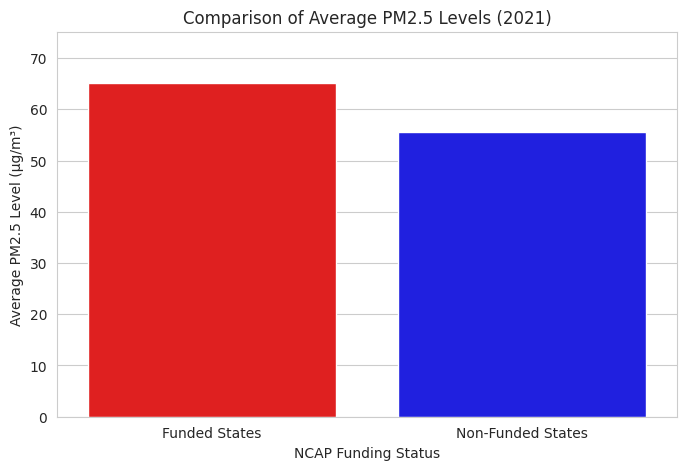

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
avg_pm25_funded = 65.14
avg_pm25_non_funded = 55.66

# Set style
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=["Funded States", "Non-Funded States"], y=[avg_pm25_funded, avg_pm25_non_funded], palette=["red", "blue"])

# Labels and title
plt.ylabel("Average PM2.5 Level (µg/m³)")
plt.xlabel("NCAP Funding Status")
plt.title("Comparison of Average PM2.5 Levels (2021)")
plt.ylim(0, max(avg_pm25_funded, avg_pm25_non_funded) + 10)

# Show plot
plt.show()


**Funding** **based**

1.Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

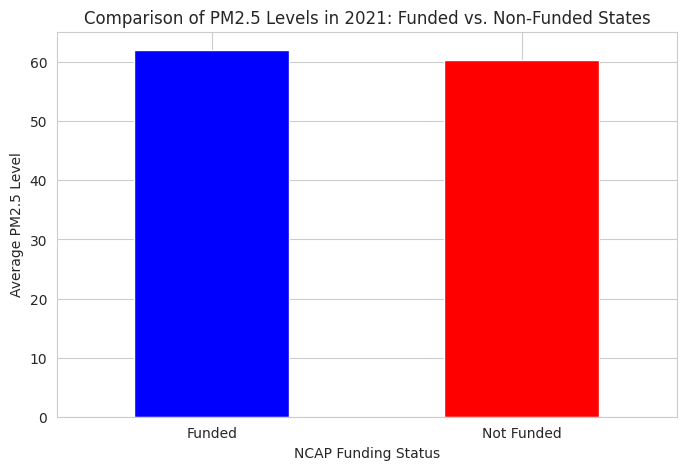

In [ ]:
#Funding Based
# Q.1
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data

data_df = pd.read_csv('/content/Data.csv')
funding_df = pd.read_csv('/content/NCAP_Funding.csv')

# Convert Timestamp to datetime and filter for 2021
data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors="coerce")
data_2021 = data_df[data_df["Timestamp"].dt.year == 2021]

# Drop rows with missing state or PM2.5 values
data_2021 = data_2021.dropna(subset=["PM2.5", "state"])

# Identify states that received NCAP funding
funded_states = set(funding_df["State"].dropna().unique())

data_2021["Funded"] = data_2021["state"].apply(lambda x: "Funded" if x in funded_states else "Not Funded")

# Calculate average PM2.5 levels for funded and non-funded states
pm25_avg = data_2021.groupby("Funded")["PM2.5"].mean()

# Create a bar plot for PM2.5 comparison
plt.figure(figsize=(8, 5))
pm25_avg.plot(kind="bar", color=["blue", "red"])

# Labels and title
plt.xlabel("NCAP Funding Status")
plt.ylabel("Average PM2.5 Level")
plt.title("Comparison of PM2.5 Levels in 2021: Funded vs. Non-Funded States")
plt.xticks(rotation=0)

# Show the plot
plt.show()
# as we can see the Average PM2.5 levels are higher in funded states

2.Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?


<ipython-input-31-748a18b98eb2>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)  # Rotate x-axis labels vertically


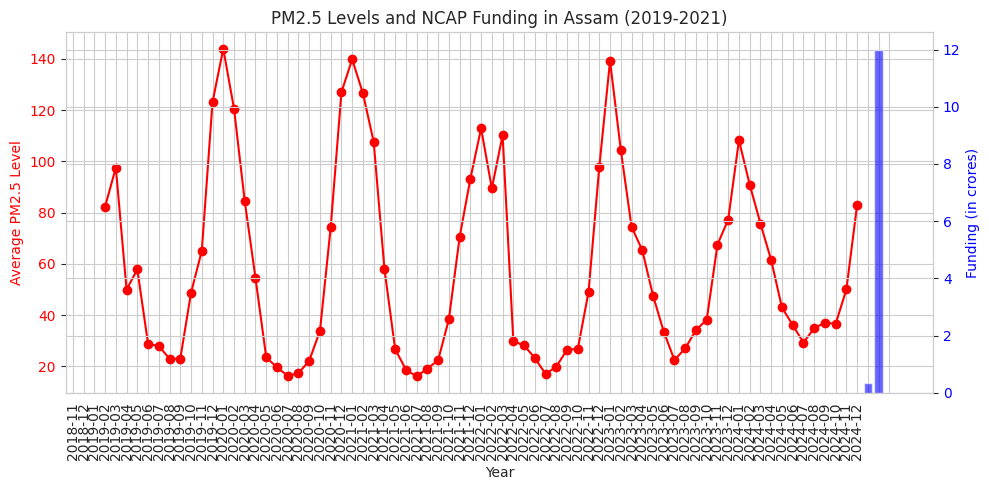

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

data_df = pd.read_csv('Data.csv')
funding_df = pd.read_csv('NCAP_Funding.csv')
state_data_df = pd.read_csv('State_data.csv')

# Convert Timestamp to datetime and filter for Assam
data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors="coerce")
assam_data = data_df[data_df["state"] == "Assam"]

# Group PM2.5 levels by month
assam_pm25 = assam_data.groupby(assam_data["Timestamp"].dt.to_period("M"))["PM2.5"].mean().reset_index()
assam_pm25["Timestamp"] = assam_pm25["Timestamp"].astype(str)

# Extract funding data for Assam
assam_funding = funding_df[funding_df["State"] == "Assam"].copy()  # Create a copy to avoid SettingWithCopyWarning
funding_columns = ["Amount released during FY 2019-20", "Amount released during FY 2020-21", "Amount released during FY 2021-22"]
for col in funding_columns:
    assam_funding.loc[:, col] = pd.to_numeric(assam_funding[col], errors="coerce")
assam_funding_sum = assam_funding[funding_columns].sum().reset_index()
assam_funding_sum.columns = ["Year", "Funding"]
assam_funding_sum["Year"] = assam_funding_sum["Year"].str.extract(r'(\d{4}-\d{2})').astype(str)

# Plot PM2.5 levels and funding trends
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(assam_pm25["Timestamp"], assam_pm25["PM2.5"], label="PM2.5 Levels", color="red", marker="o")
ax1.set_xlabel("Year")
ax1.set_ylabel("Average PM2.5 Level", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)  # Rotate x-axis labels vertically

# Add second y-axis for funding
ax2 = ax1.twinx()
ax2.bar(assam_funding_sum["Year"], assam_funding_sum["Funding"], label="NCAP Funding", color="blue", alpha=0.6)
ax2.set_ylabel("Funding (in crores)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Title and legend
plt.title("PM2.5 Levels and NCAP Funding in Assam (2019-2021)")
fig.tight_layout()
plt.show()
# by increasing the funds, there is an improvement in the air quality.

3.Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.



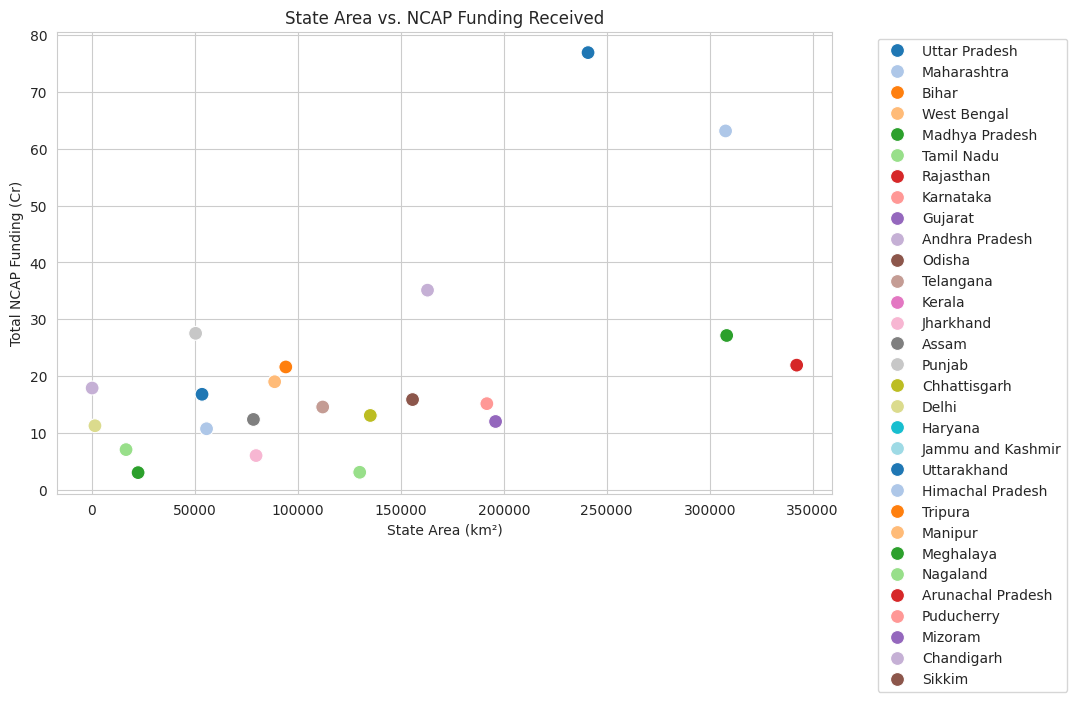

In [ ]:
# Q.3
# Scatter Plot: Area vs. NCAP Funding (Colored by State)
# Loading the data
state_data = pd.read_csv('/content/State_data.csv')
ncap_funding = pd.read_csv('/content/NCAP_Funding.csv')

# Aggregate funding by state
state_funding = ncap_funding.groupby("State")["Total fund released"].sum().reset_index()

# Merge with state area data
merged_data = pd.merge(state_data, state_funding, on="State", how="left")

# Scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x=merged_data["Area (km2)"],
    y=merged_data["Total fund released"],
    hue=merged_data["State"],
    palette="tab20",
    s=100
)

# Labels and title
plt.xlabel("State Area (km²)")
plt.ylabel("Total NCAP Funding (Cr)")
plt.title("State Area vs. NCAP Funding Received")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # Legend outside plot
plt.show()


**Miscellaneous** **Questions**

1.For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)[1 Mark]


In [ ]:
# Q.1
# Most Polluted City in 2023 (Percentage of Hazardous Days)
# Filter data for 2023
df = pd.read_csv('/content/Data.csv')
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df_2023 = df[df["Timestamp"].dt.year == 2023]

# Identify the most polluted city
city_avg_pm25 = df_2023.groupby("city")["PM2.5"].mean()
most_polluted_city = city_avg_pm25.idxmax()

# Calculate percentage of hazardous days
city_data = df_2023[df_2023["city"] == most_polluted_city]
hazardous_days = (city_data["PM2.5"] > 300).sum()
total_days = city_data["Timestamp"].nunique()
percentage_hazardous = (hazardous_days / total_days) * 100

print(f"The most polluted city in 2023 was {most_polluted_city}.It is with {percentage_hazardous:.2f}% of days exceeding hazardous PM2.5 levels.")


The most polluted city in 2023 was Darbhanga.It is with 0.82% of days exceeding hazardous PM2.5 levels.


2.Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?[1.5 Mark]


<ipython-input-38-67fc36f5b6d7>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diwali_months = delhi_data[df["Timestamp"].dt.month.isin([10, 11])]
<ipython-input-38-67fc36f5b6d7>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_year_months = delhi_data[df["Timestamp"].dt.month.isin([12, 1])]
<ipython-input-38-67fc36f5b6d7>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  regular_months = delhi_data[~df["Timestamp"].dt.month.isin([10, 11, 12, 1])]


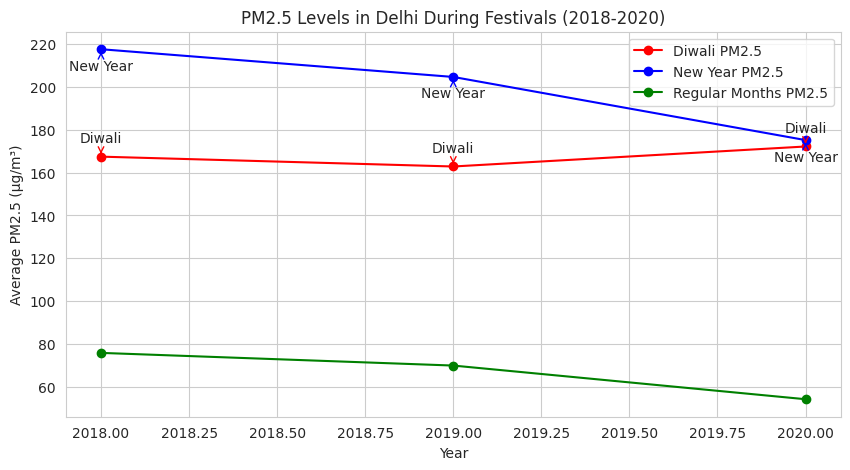

In [ ]:
# Q.2
import numpy as np
#Delhi PM2.5 Spikes (Diwali & New Year)
# Filter Delhi data for 2018-2020
delhi_data = df[(df["state"] == "Delhi") & (df["Timestamp"].dt.year.isin([2018, 2019, 2020]))]

# Extract Diwali & New Year periods
diwali_months = delhi_data[df["Timestamp"].dt.month.isin([10, 11])]
new_year_months = delhi_data[df["Timestamp"].dt.month.isin([12, 1])]
regular_months = delhi_data[~df["Timestamp"].dt.month.isin([10, 11, 12, 1])]

# Compute average PM2.5
diwali_avg = diwali_months.groupby(delhi_data["Timestamp"].dt.year)["PM2.5"].mean()
new_year_avg = new_year_months.groupby(delhi_data["Timestamp"].dt.year)["PM2.5"].mean()
regular_avg = regular_months.groupby(delhi_data["Timestamp"].dt.year)["PM2.5"].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(diwali_avg.index, diwali_avg.values, marker="o", color="red", label="Diwali PM2.5")
plt.plot(new_year_avg.index, new_year_avg.values, marker="o", color="blue", label="New Year PM2.5")
plt.plot(regular_avg.index, regular_avg.values, marker="o", color="green", label="Regular Months PM2.5")

# Marking spikes
for year in diwali_avg.index:
    plt.annotate("Diwali", (year, diwali_avg[year]), textcoords="offset points", xytext=(0,10), ha='center', arrowprops=dict(arrowstyle="->", color='red'))

for year in new_year_avg.index:
    plt.annotate("New Year", (year, new_year_avg[year]), textcoords="offset points", xytext=(0,-15), ha='center', arrowprops=dict(arrowstyle="->", color='blue'))

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("PM2.5 Levels in Delhi During Festivals (2018-2020)")
plt.legend()
plt.show()
# I observed a significant spikes during these festivals.

3.Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.[1 Mark]


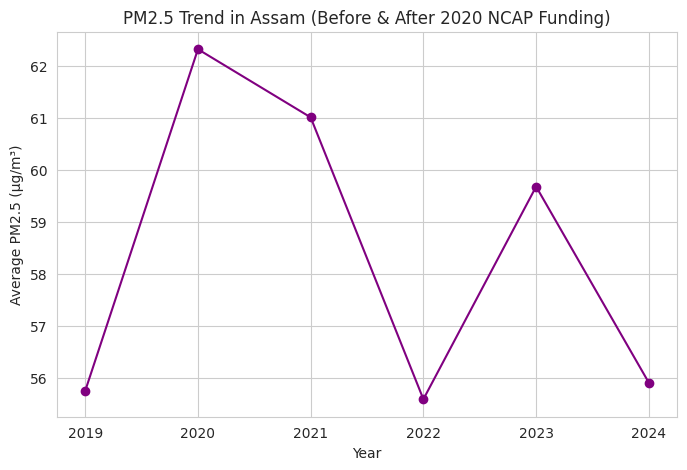

In [ ]:
# Q.3
#Highest NCAP Funding in 2020 & Air Quality Trends
# Identify state with highest funding in 2020
highest_funded_state = ncap_funding.loc[ncap_funding["Amount released during FY 2020-21"].idxmax(), "State"]

# Extract PM2.5 trends for this state
state_data = df[df["state"] == highest_funded_state]
yearly_avg_pm25 = state_data.groupby(df["Timestamp"].dt.year)["PM2.5"].mean()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(yearly_avg_pm25.index, yearly_avg_pm25.values, marker="o", color="purple")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title(f"PM2.5 Trend in {highest_funded_state} (Before & After 2020 NCAP Funding)")
plt.show()
# the state that received highest NCAP funding is Assam.
# here the pollution levels are fluctuating.But the air pollution levels are improved after the air pollution level in the year 2020.

4.Draw the map of India and plot the sensor locations on the map.[1.5 Mark]


In [55]:
import geopandas as gpd
shapefile_path = "/Users/tanmai/Downloads/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

# Load the shapefile using GeoPandas
world = gpd.read_file("shapefile_path")

# Filter the data for India
india_map = world[world['ADMIN'] == "India"]

# Plot India map
ax = india_map.plot(color='lightgrey', edgecolor='black')

# Plot sensor locations
sensor_locations = df[['latitude', 'longitude']].dropna()

# Make sure the column names are correctly referenced
sensor_locations.plot(kind='scatter', x='longitude', y='latitude', ax=ax, color='red', label='Sensor Location')

# Add legend
plt.legend()

# Show the plot
plt.show()

DataSourceError: shapefile_path: No such file or directory

In [ ]:
import geopandas as gpd

# Load India's map
data = pd.read_csv("naturalearth_lowres")
india_map = data[india_map["name"] == "India"]


# Extract sensor locations (latitude & longitude)
sensor_locations = df.dropna(subset=["Latitude", "Longitude"])[["Latitude", "Longitude"]]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
india_map.plot(ax=ax, color="lightgrey")
plt.scatter(sensor_locations["Longitude"], sensor_locations["Latitude"], color="red", s=10, label="Air Quality Sensors")

# Labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sensor Locations Across India")
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'naturalearth_lowres'

**Tell** **us** **something** **new**

Which state (consider all stations in that state) has the lowest average PM2.5 concentration across all stations and in year 2021?

In [ ]:
import pandas as pd

# Load the dataset

data_df = pd.read_csv('/content/Data.csv')

# Convert Timestamp to datetime format
data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors="coerce")

# Filter for the year 2021
data_2021 = data_df[data_df["Timestamp"].dt.year == 2021]

# Group by state and compute the average PM2.5 concentration
state_avg_pm25 = data_2021.groupby("state")["PM2.5"].mean()

# Find the state with the lowest average PM2.5
lowest_pm25_state = state_avg_pm25.idxmin()
lowest_pm25_value = state_avg_pm25.min()

print(f"State with the lowest average PM2.5 in 2021 is {lowest_pm25_state} with {lowest_pm25_value:.2f} µg/m³")


State with the lowest average PM2.5 in 2021 is Meghalaya with 12.20 µg/m³
